## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
data_df.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
len(pd.unique(data_df["Mouse ID"]))

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

data_df["Mouse ID"].value_counts()

g989    13
l733    10
l725    10
a685    10
c264    10
        ..
n482     1
t573     1
u153     1
d133     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate = data_df[data_df.duplicated("Mouse ID")]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = data_df.drop_duplicates(subset=["Mouse ID"], keep= "last")
clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [9]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(clean["Mouse ID"]))


249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Mean = clean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
Median = clean.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
Variance = clean.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
Standard_Deviation = clean.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM = clean.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
drug_index = sorted(pd.unique(clean["Drug Regimen"]))
drug_summary = {"Mean": Mean, "Median": Median, "Variance": Variance, "Standard Deviation": Standard_Deviation,
               "SEM": SEM}
drug_summary_df = pd.DataFrame(data=drug_summary, index=drug_index)
drug_summary_df = drug_summary_df.style.set_caption("Tumor Volume Stats per Drug Regimen")
drug_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056
Zoniferol,59.181258,61.840058,76.862027,8.767099,1.753420


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_by_regimen = clean[["Drug Regimen","Tumor Volume (mm3)","Tumor Volume (mm3)","Tumor Volume (mm3)","Tumor Volume (mm3)","Tumor Volume (mm3)"]]
summary_by_regimen.columns=["Drug Regimen", "Mean","Median","Variance","Standard Deviation","SEM"]
table = summary_by_regimen.groupby("Drug Regimen").agg({"Mean":"mean",
                                                        "Median":"median",
                                                        "Variance":"var",
                                                        "Standard Deviation":"std",
                                                        "SEM":"sem"})
table = table.style.set_caption("Tumor Volume Stats per Drug Regimen")
table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

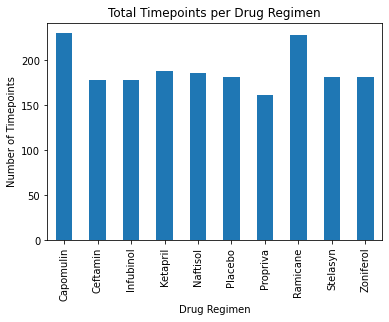

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

data_df.groupby("Drug Regimen")["Timepoint"].count().plot(kind="bar",ylabel="Number of Timepoints",
                                                                title="Total Timepoints per Drug Regimen")
plt.show()

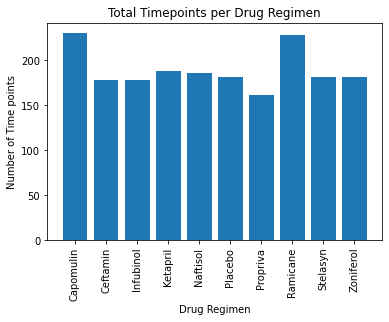

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(sorted(pd.unique(data_df["Drug Regimen"])),data_df.groupby("Drug Regimen")["Timepoint"].count())
plt.xticks(rotation=90)
plt.title("Total Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Time points")
plt.show()

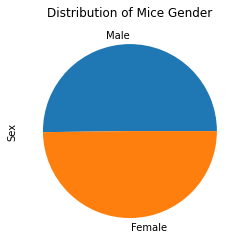

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean.Sex.value_counts().plot(kind="pie")
plt.title("Distribution of Mice Gender")
plt.show()

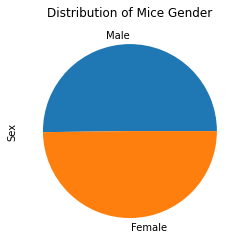

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(clean.Sex.value_counts(), labels=["Male", "Female"])
plt.ylabel("Sex")#Title to match pandas
plt.title("Distribution of Mice Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

reduced_clean = clean[~clean['Drug Regimen'].isin(["Propriva","Naftisol","Ketapril","Zoniferol","Placebo","Stelasyn"])]


In [21]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

lowerq = reduced_clean["Tumor Volume (mm3)"].quantile(.25)
upperq = reduced_clean["Tumor Volume (mm3)"].quantile(.75)
iqr = upperq-lowerq
print(f"lowerq {lowerq} \nupperq {upperq} \niqr {iqr}")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
for drug in drug_list:
    drug_name = reduced_clean[reduced_clean["Drug Regimen"] == drug]
    value = [x for x in drug_name["Tumor Volume (mm3)"]]
    tumor_vol.append(value)    
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"lower bound {lower_bound}\nupper bound {upper_bound}")    

lowerq 37.1877438025 
upperq 59.930261755 
iqr 22.742517952499995
lower bound 3.0739668737500097
upper bound 94.04403868374999


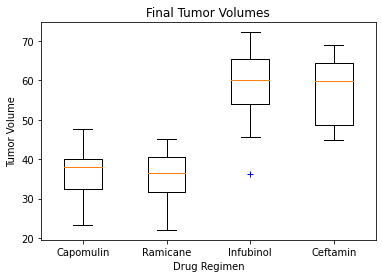

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

box_plots = {}
for x in range(0,4):
    box_plots[drug_list[x]]=tumor_vol[x]
    
fig, ax = plt.subplots()
ax.boxplot(box_plots.values(), sym='b+')
ax.set_xticklabels(box_plots.keys())
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume")
plt.xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

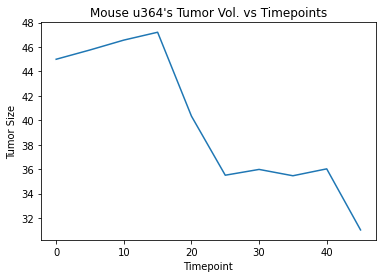

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = data_df[data_df["Mouse ID"] == "u364"]
plt.plot(mouse["Timepoint"],mouse["Tumor Volume (mm3)"])
plt.title("Mouse u364's Tumor Vol. vs Timepoints")
plt.ylabel("Tumor Size")
plt.xlabel("Timepoint")
plt.show()

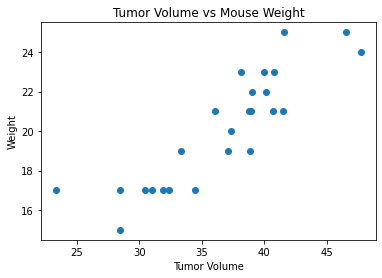

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = reduced_clean[reduced_clean["Drug Regimen"] == "Capomulin"]
plt.scatter(capomulin["Tumor Volume (mm3)"],capomulin["Weight (g)"])
plt.title("Tumor Volume vs Mouse Weight")
plt.xlabel("Tumor Volume")
plt.ylabel("Weight")
plt.show()

## Correlation and Regression

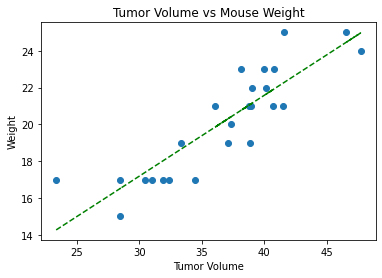

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_coefficient = st.pearsonr(capomulin["Tumor Volume (mm3)"],capomulin["Weight (g)"])[0]
cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(capomulin["Tumor Volume (mm3)"],capomulin["Weight (g)"])
cap_fit = cap_slope * capomulin["Tumor Volume (mm3)"] + cap_int
plt.scatter(capomulin["Tumor Volume (mm3)"],capomulin["Weight (g)"])
plt.title("Tumor Volume vs Mouse Weight")
plt.xlabel("Tumor Volume")
plt.ylabel("Weight")
plt.plot(capomulin["Tumor Volume (mm3)"], cap_fit, "g--")
plt.show()